# Network Analysis on Auckland road data
### Import packages

In [1]:
!pip install osmnx geojson

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.4/107.4 kB 1.2 MB/s eta 0:00:00


In [2]:
import numpy as np
import pandas as pd
import osmnx as ox
import geopandas as gpd
from shapely.geometry import MultiPolygon
from shapely.ops import transform
import pyproj
from shapely.ops import unary_union
import networkx as nx
import math
import matplotlib.pyplot as plt
import geojson
from pyproj import CRS
import shapely.geometry as geom
from shapely.geometry import Polygon
import itertools

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Creating bboxes of interest

In [4]:
#Small
lat, lon = -37.81546317966284, 144.96224961620135
bbox_width = 350  # in meters
bbox_height = 350  # in meters
min_lon = lon - (bbox_width / (111.32 * 1000))  # 1 degree of longitude at the equator is approximately 111.32 km
max_lon = lon + (bbox_width / (111.32 * 1000))
min_lat = lat - (bbox_height / (111.32 * 1000))
max_lat = lat + (bbox_height / (111.32 * 1000))
bbox_polygon = Polygon([(min_lon, min_lat), (min_lon, max_lat), (max_lon, max_lat), (max_lon, min_lat)])
smol_bbox = gpd.GeoDataFrame(geometry=[bbox_polygon], crs='EPSG:4326')

In [5]:
#Large
lat, lon = -37.81233142904083, 144.96510955648753
bbox_width = 1000  # in meters
bbox_height = 1000  # in meters
min_lon = lon - (bbox_width / (111.32 * 1000))  # 1 degree of longitude at the equator is approximately 111.32 km
max_lon = lon + (bbox_width / (111.32 * 1000))
min_lat = lat - (bbox_height / (111.32 * 1000))
max_lat = lat + (bbox_height / (111.32 * 1000))
bbox_polygon = Polygon([(min_lon, min_lat), (min_lon, max_lat), (max_lon, max_lat), (max_lon, min_lat)])
full_bbox = gpd.GeoDataFrame(geometry=[bbox_polygon], crs='EPSG:4326')

In [6]:
smol_bbox = smol_bbox.iloc[0]['geometry']
full_bbox = full_bbox.iloc[0]['geometry']

### Generating the road network

In [7]:
Gsmol = ox.graph.graph_from_polygon(smol_bbox, network_type="walk", simplify=True, retain_all=True, truncate_by_edge=True)
Gfull = ox.graph.graph_from_polygon(full_bbox, network_type="drive", simplify=True, retain_all=True, truncate_by_edge=True)

In [8]:
# Add speed, length
# Gfull = ox.add_edge_speeds(Gfull)
# Gfull = ox.add_edge_travel_times(Gfull)
Gfull = ox.distance.add_edge_lengths(Gfull)

In [9]:
# Gfull = ox.simplification.consolidate_intersections(Gfull, rebuild_graph=True, tolerance=15, dead_ends=False)

In [10]:
Gfull = Gfull.to_undirected()

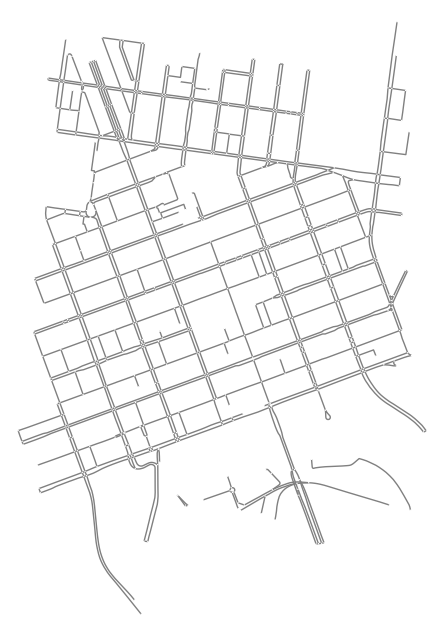

(<Figure size 800x800 with 1 Axes>, <Axes: >)

In [11]:
ox.plot_graph(Gfull, node_size=1, edge_color='gray', bgcolor='white')

In [12]:
# Add length
Gsmol = ox.distance.add_edge_lengths(Gsmol)
# Gsmol = ox.consolidate_intersections(Gsmol, rebuild_graph=True, tolerance=10, dead_ends=False)

In [13]:
Gsmol = Gsmol.to_undirected()

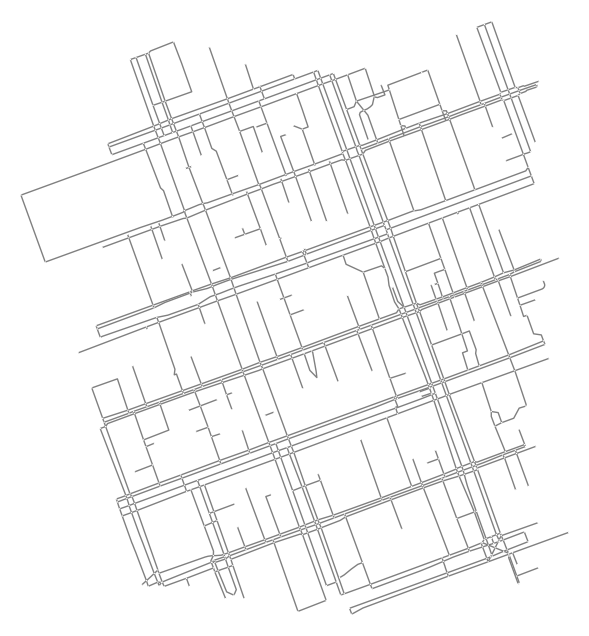

(<Figure size 800x800 with 1 Axes>, <Axes: >)

In [14]:
ox.plot_graph(Gsmol, node_size=1, edge_color='gray', bgcolor='white')

In [15]:
if not nx.is_connected(Gfull):
    # Get the list of disconnected components
    disconnected_components = list(nx.connected_components(Gfull))
    print(len(disconnected_components))
    first_component = disconnected_components[0]
    print(first_component)
    G_sub_full = Gfull.subgraph(first_component)
    print(len(list(nx.connected_components(G_sub_full))))

5
{1725216770, 6381512708, 6381512709, 1725216788, 9512482841, 9512482852, 9512482857, 1725216810, 767670317, 6775859250, 6775859251, 2165149751, 7759495227, 7759495228, 1725216895, 846547014, 1725216852, 1042174041, 30943324, 30943325, 30943326, 30943327, 1725216871, 11135234153, 11135234154, 11135234155, 11135234156, 4544096366, 174792823, 33085559, 2190483577, 2190483578, 2190483579, 2190483580, 2190483581, 2190483583, 767584383, 2190483585, 2190483586, 2190483587, 2190483588, 2190483589, 2190483590, 2190483591, 2190483592, 33085575, 2190483594, 2190483595, 846547082, 2190483597, 2190483598, 2190483600, 767658128, 2200514710, 777832599, 6381291673, 6381291674, 6381291675, 6381291676, 174792857, 589402268, 1725216922, 30220444, 777832607, 2200514713, 589402289, 244244659, 1492383932, 777832638, 1492383934, 589402311, 1833117899, 1833117901, 8633729231, 8633729232, 8633729233, 8633729234, 8633729235, 8633729236, 591294679, 317536476, 2384091371, 2384091372, 9756035309, 9756035310, 238

In [16]:
if not nx.is_connected(Gsmol):
    # Get the list of disconnected components
    disconnected_components = list(nx.connected_components(Gsmol))
    print(len(disconnected_components))
    first_component = disconnected_components[0]
    print(first_component)
    G_sub_smol = Gsmol.subgraph(first_component)
    print(len(list(nx.connected_components(G_sub_smol))))

4
{612741123, 6722119687, 6722119688, 6722119689, 6722119690, 113541129, 6722119691, 6722119692, 6722119695, 6722119696, 6722119697, 6722119699, 6722119700, 6722119701, 598405143, 174796824, 2247272473, 9512482851, 9512482852, 6800693285, 9512482854, 6167236647, 6167236648, 6167236649, 6167236650, 9512482861, 2165149751, 6722119753, 6722119754, 6933053520, 6167236689, 6167236692, 6167236693, 6167236694, 174815317, 6167236695, 6167236696, 6933053533, 607756402, 6933053557, 6933053558, 6933053559, 174792823, 1964021884, 1964021886, 1964021894, 2190483591, 2190483592, 1964021896, 2190483600, 174792857, 6167191723, 6167191724, 6167191725, 6167191726, 6167191729, 6167191730, 2190567601, 113535163, 9756035261, 9756035262, 9756035265, 9756035266, 6800617667, 6800617670, 6800617673, 113535179, 6800617684, 2960003295, 131221744, 2180815093, 10598310134, 621539575, 621539576, 621539577, 621539578, 10598310136, 2177124604, 2177124606, 2384091390, 6933068034, 6933068035, 2177124612, 2384091395, 67

In [17]:
ox.io.save_graph_shapefile(G_sub_smol, "/content/drive/MyDrive/UCL/ABMs/cw2/Gsmol_geopackage.gpkg")
ox.io.save_graph_shapefile(G_sub_full, "/content/drive/MyDrive/UCL/ABMs/cw2/Gfull_geopackage.gpkg")


# ox.save_graphml(G_sub, '/content/drive/MyDrive/UCL/ABMs/cw2/melb_network.graphml')

<ipython-input-17-32af1c8b15b6>:1: FutureWarning: The `save_graph_shapefile` function is deprecated and will be removed in the v2.0.0 release. Instead, use the `save_graph_geopackage` function to save graphs as GeoPackage files for subsequent GIS analysis. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  ox.io.save_graph_shapefile(G_sub_smol, "/content/drive/MyDrive/UCL/ABMs/cw2/Gsmol_geopackage.gpkg")
/usr/local/lib/python3.10/dist-packages/osmnx/io.py:115: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  gdf_nodes.to_file(filepath_nodes, driver="ESRI Shapefile", index=True, encoding=encoding)
<ipython-input-17-32af1c8b15b6>:2: FutureWarning: The `save_graph_shapefile` function is deprecated and will be removed in the v2.0.0 release. Instead, use the `save_graph_geopackage` function to save graphs as GeoPackage files for subsequent GIS analysis. See the OSMnx v2 migration guide: https://github.com/gbo

In [18]:
pd.set_option('display.max_columns', None)

gdf_smol = gpd.read_file("/content/drive/MyDrive/UCL/ABMs/cw2/Gsmol_geopackage.gpkg/edges.shp")
gdf_smol = gdf_smol.reset_index()
gdf_smol = gdf_smol[['geometry', 'index','length']]

gdf_full = gpd.read_file("/content/drive/MyDrive/UCL/ABMs/cw2/Gfull_geopackage.gpkg/edges.shp")
gdf_full = gdf_full.reset_index()
gdf_full = gdf_full[['geometry', 'index','length']]

# gdf_full.head()

<Axes: >

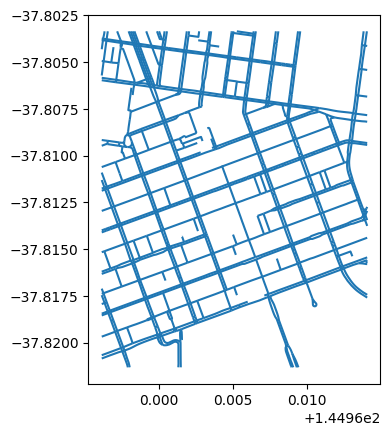

In [19]:
# Clip the GeoDataFrame
clipped_gdf_full = gpd.clip(gdf_full, full_bbox)
clipped_gdf_full = clipped_gdf_full[['geometry', 'index','length']]
clipped_gdf_full.plot()

<Axes: >

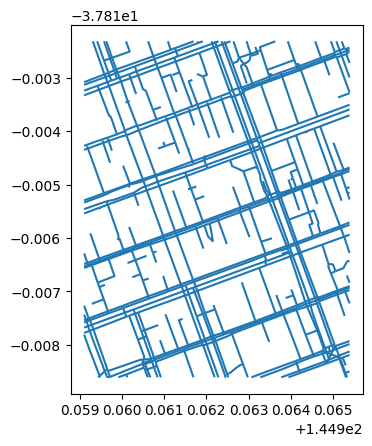

In [20]:
clipped_gdf_smol = gpd.clip(gdf_smol, smol_bbox)
clipped_gdf_smol = clipped_gdf_smol[['geometry', 'index','length']]
clipped_gdf_smol.plot()

In [21]:
# Save the clipped GeoDataFrame to a new file
clipped_gdf_full = clipped_gdf_full[['geometry', 'index','length']]
clipped_gdf_full = clipped_gdf_full.to_crs(crs=4326)

clipped_gdf_full.to_file("full_network", driver='ESRI Shapefile')

In [22]:
clipped_gdf_full.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [23]:
# Save the clipped GeoDataFrame to a new file
clipped_gdf_smol = clipped_gdf_smol[['geometry', 'index','length']]
clipped_gdf_smol = clipped_gdf_smol.to_crs(crs=4326)
clipped_gdf_smol.to_file("smol_network", driver='ESRI Shapefile')

## Get cafes

<ipython-input-24-82b9a0dd9813>:12: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  clipped_cafes_full.to_file("full_cafes", driver='ESRI Shapefile')


<Axes: >

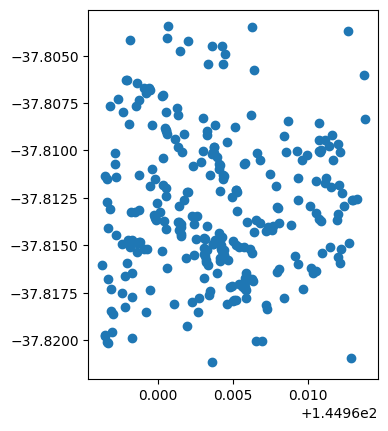

In [24]:
tags = {'amenity': ['cafe']}
cafes = ox.features.features_from_point(center_point=(-37.812528687696364, 144.96260097649974), dist=3000, tags=tags)

# Convert polygon to point by getting its centroid
for idx, row in cafes.iterrows():
    if isinstance(row['geometry'], geom.Polygon):
        cafes.at[idx, 'geometry'] = row['geometry'].centroid

# Clip the GeoDataFrame
clipped_cafes_full = gpd.clip(cafes, full_bbox)
clipped_cafes_full = clipped_cafes_full[['geometry']]
clipped_cafes_full.to_file("full_cafes", driver='ESRI Shapefile')

clipped_cafes_full.plot()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-25-54b1231b91b6>:4: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  clipped_cafes_smol.to_file("smol_cafes", driver='ESRI Shapefile')


<Axes: >

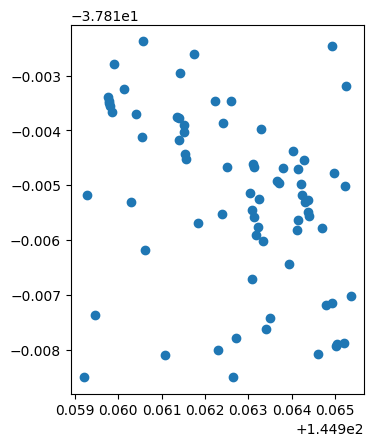

In [25]:
# Clip the GeoDataFrame
clipped_cafes_smol = gpd.clip(cafes, smol_bbox)
clipped_cafes_smol = clipped_cafes_smol[['geometry']]
clipped_cafes_smol.to_file("smol_cafes", driver='ESRI Shapefile')

clipped_cafes_smol.plot()

In [26]:
cafes.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<frozen importlib._bootstrap>:914: ImportWarning: _PyDrive2ImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _PyDriveImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _GenerativeAIImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _OpenCVImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: APICoreClientInfoImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bo

addr:housenumber addr:postcode addr:state  \
element_type osmid                                                 
node         245806622              161          3053        VIC   
             245806668              222          3053        VIC   
             247633178              139          3068        NaN   
             331166210              329          3053        VIC   
             421105890               68          3121        VIC   

                            addr:street addr:suburb air_conditioning amenity  \
element_type osmid                                                             
node         245806622     Barry Street     Carlton              yes    cafe   
             245806668    Pelham Street     Carlton              NaN    cafe   
             247633178    Queens Parade         NaN              NaN    cafe   
             331166210     Lygon Street     Carlton              NaN    cafe   
             421105890  Victoria Street    Richmond              NaN    cafe   

                       capacity  check_date  \
element_type osmid                            
node         245806622       50  2024-03-07   
             245806668      NaN         NaN   
             247633178      NaN         NaN   
             331166210      NaN  2022-10-02   
             421105890      NaN         NaN   

                                                    cuisine  \
element_type osmid                                            
node         245806622  coffee_shop;sandwich;cake;salad;pie   
             245806668            sandwich;cake;coffee_shop   
             247633178                                  NaN   
             331166210                                  NaN   
             421105890                                  NaN   

                                                              description  \
element_type osmid                                                          
node         245806622  Baretto serves coffee and stocks a range of ca...   
             245806668                                                NaN   
             247633178                                                NaN   
             331166210                                                NaN   
             421105890                                                NaN   

                       drive_through internet_access internet_access:fee  \
element_type osmid                                                         
node         245806622            no            wlan                  no   
             245806668           NaN             NaN                 NaN   
             247633178           NaN             NaN                 NaN   
             331166210           NaN             NaN                 NaN   
             421105890           NaN             NaN                 NaN   

                         internet_access:ssid level                  name  \
element_type osmid                                                          
node         245806622  Eduroam & Uniwireless     0  Baretto Espresso Bar   
             245806668                    NaN   NaN    Books n Bites Cafe   
             247633178                    NaN   NaN      Rubber Duck Cafe   
             331166210                    NaN   NaN  Heartattack and Vine   
             421105890                    NaN   NaN       Victoria Lounge   

                                                            opening_hours  \
element_type osmid                                                          
node         245806622                                  Mo-Fr 06:00-15:00   
             245806668                                                NaN   
             247633178                                                NaN   
             331166210  Mo-Th 08:00-22:30; Fr-Sa 08:00-23:00; Su 08:00...   
             421105890                                                NaN   

                       outdoor_seating payment:cash payment:

# Getting satellite image for background

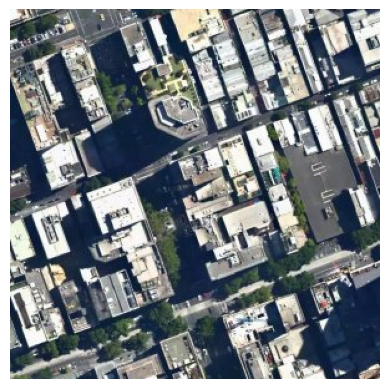

In [29]:
import requests
from PIL import Image
from io import BytesIO
from shapely.geometry import Polygon
import geopandas as gpd
from tqdm import tqdm

# Define the bounding box parameters
lat, lon = -37.81546317966284, 144.96224961620135
bbox_width = 350  # in meters
bbox_height = 350  # in meters
min_lon = lon - (bbox_width / (111.32 * 1000))  # 1 degree of longitude at the equator is approximately 111.32 km
max_lon = lon + (bbox_width / (111.32 * 1000))
min_lat = lat - (bbox_height / (111.32 * 1000))
max_lat = lat + (bbox_height / (111.32 * 1000))
bbox_polygon = Polygon([(min_lon, min_lat), (min_lon, max_lat), (max_lon, max_lat), (max_lon, min_lat)])
smol_bbox = gpd.GeoDataFrame(geometry=[bbox_polygon], crs='EPSG:4326')

# Mapbox access token
mapbox_access_token = 'pk.eyJ1IjoiamFua29tYWciLCJhIjoiY2s4bzhrejB3MDBrbTNsbXpzaGZ3dWhvaSJ9.ERSsv7bCQ2XyzysZtve0xg'

# Customize the parameters based on your requirements
params = {
    'access_token': mapbox_access_token,
    'style': 'satellite-v9',
    'lat': lat,
    'lon': lon,
    'zoom': 16,  # Adjust zoom level accordingly
    'width': 595,  # Width of the image in pixels
    'height': 595  # Height of the image in pixels
}

# Send a request to the Mapbox Static Tiles API
response = requests.get('https://api.mapbox.com/styles/v1/mapbox/satellite-v9/static/{lon},{lat},{zoom}/{width}x{height}?access_token={access_token}'.format(**params))

# Check if the request was successful
if response.status_code == 200:
    # Open the image using PIL
    img = Image.open(BytesIO(response.content))

    # Calculate the conversion factor from degrees to pixels
    lon_range = max_lon - min_lon
    lat_range = max_lat - min_lat
    img_width, img_height = img.size
    lon_to_px = img_width / lon_range
    lat_to_px = img_height / lat_range

    # Convert bounding box coordinates to image coordinates
    left = int((min_lon - lon) * lon_to_px)
    top = int((lat - max_lat) * lat_to_px)
    right = int((max_lon - lon) * lon_to_px)
    bottom = int((lat - min_lat) * lat_to_px)

    # Ensure coordinates are within image bounds
    left = max(0, left)
    top = max(0, top)
    right = min(img_width, right)
    bottom = min(img_height, bottom)

    # Crop the image to the bounding box extent
    img_cropped = img.crop((left, top, right, bottom))

    # Save the cropped image
    image_filename = "smol_bckgd.png"
    img_cropped.save(image_filename, 'JPEG')
    # Display the cropped image
    plt.imshow(img_cropped)
    plt.axis('off')  # Turn off axis
    plt.show()
else:
    print(f"Error: {response.status_code}, {response.text}")

Image saved successfully.


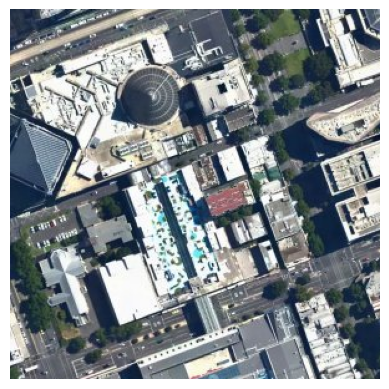

In [30]:
#Large
lat, lon = -37.81233142904083, 144.96510955648753
bbox_width = 1000  # in meters
bbox_height = 1000  # in meters
min_lon = lon - (bbox_width / (111.32 * 1000))  # 1 degree of longitude at the equator is approximately 111.32 km
max_lon = lon + (bbox_width / (111.32 * 1000))
min_lat = lat - (bbox_height / (111.32 * 1000))
max_lat = lat + (bbox_height / (111.32 * 1000))
bbox_polygon = Polygon([(min_lon, min_lat), (min_lon, max_lat), (max_lon, max_lat), (max_lon, min_lat)])
full_bbox = gpd.GeoDataFrame(geometry=[bbox_polygon], crs='EPSG:4326')

# Customize the parameters based on your requirements
params = {
    'access_token': mapbox_access_token,
    'style': 'satellite-v9',
    'lat': lat,
    'lon': lon,
    'zoom': 16,  # Adjust zoom level accordingly
    'width': 595,  # Width of the image in pixels
    'height': 595  # Height of the image in pixels
}

# Send a request to the Mapbox Static Tiles API
response = requests.get('https://api.mapbox.com/styles/v1/mapbox/satellite-v9/static/{lon},{lat},{zoom}/{width}x{height}?access_token={access_token}'.format(**params))

# Check if the request was successful
if response.status_code == 200:
    # Open the image using PIL
    img = Image.open(BytesIO(response.content))

    # Calculate the conversion factor from degrees to pixels
    lon_range = max_lon - min_lon
    lat_range = max_lat - min_lat
    img_width, img_height = img.size
    lon_to_px = img_width / lon_range
    lat_to_px = img_height / lat_range

    # Convert bounding box coordinates to image coordinates
    left = int((min_lon - lon) * lon_to_px)
    top = int((lat - max_lat) * lat_to_px)
    right = int((max_lon - lon) * lon_to_px)
    bottom = int((lat - min_lat) * lat_to_px)

    # Ensure coordinates are within image bounds
    left = max(0, left)
    top = max(0, top)
    right = min(img_width, right)
    bottom = min(img_height, bottom)

    # Crop the image to the bounding box extent
    img_cropped = img.crop((left, top, right, bottom))

    # Save the cropped image
    image_filename = "full_bckgd.png"
    img_cropped.save(image_filename, 'JPEG')
    print("Image saved successfully.")
    # Display the cropped image
    plt.imshow(img_cropped)
    plt.axis('off')  # Turn off axis
    plt.show()
else:
    print(f"Error: {response.status_code}, {response.text}")